# Сбор данных, API

## 1. Доступ к API vk

51568202 - id приложения в Вк

In [1]:
# Версия ипользуемого API
version = '5.131'

# Подгружаем токен из файлика на пк
with open('token.txt') as f:
    token = f.read()

In [35]:
import requests
from tqdm import tqdm_notebook
import time

In [15]:
method = 'users.get'
parameters = 'user_ids=187181904'
url = 'https://api.vk.com/method/' + method + \
'?' + parameters + '&v=' + version + '&access_token=' + token

In [16]:
response = requests.get(url)

In [22]:
type(response.json())

dict

In [20]:
response.json()['response'][0]['first_name']

'Михаил'

In [23]:
from typing import Dict

def vk_download(method: str, parameters: str) -> Dict[any, any]:
    url = 'https://api.vk.com/method/' + method + \
    '?' + parameters + '&v=' + version + '&access_token=' + token
    response = requests.get(url)
    return response.json()

In [27]:
vk_download('users.get','user_ids=187181904&fields=bdate,city')

{'response': [{'id': 187181904,
   'bdate': '21.6.2003',
   'city': {'id': 1, 'title': 'Москва'},
   'first_name': 'Михаил',
   'last_name': 'Копылов',
   'can_access_closed': True,
   'is_closed': False}]}

 ## 2. Хмм

id_group = "ooioioioioioo"

https://vk.com/ooioioioioioo

Гипотеза в том, что людям нравятся цитаты с местоимениями и их часто лайкают и репостят. Обезличенные цитаты меньше любят

In [71]:
group_id = '-26610299'
wall = vk_download('wall.get', 'owner_id='+group_id+'&count=100')['response']
len(wall['items'])

100

In [47]:
wall['count']

11202

In [48]:
len(wall['items'])

20

Максимум за 1 запрос можно подгрузить 100 постов, поэтому можно использовать цикл со смещением (`offset`).
Заметка: ВК разрешает делать 3 запроса в секунду, если сделаем больше, то нас забанит, поэтому `time.sleep(1)` наш выход

In [49]:
n = wall['count']
n//100 # Кол-во запросов

112

In [72]:
infa = {
    'id':[],
    'text':[],
    'likes':[]
}

for i in tqdm_notebook(range(0, 1000, 100)):
    time.sleep(0.4)
    wall = vk_download('wall.get', 'owner_id='+group_id+'&count=100&offset='+str(i))['response']['items']
    infa['id'].extend([item['id'] for item in wall])
    infa['likes'].extend([item['likes']['count'] for item in wall])
    infa['text'].extend([item['text'] for item in wall])

C:\Users\misha\AppData\Local\Temp/ipykernel_21632/505291332.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, 1000, 100)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [73]:
len(infa['id'])

1000

In [74]:
import pandas as pd

df=pd.DataFrame(infa)

In [75]:
df.head()

,id,text,likes
0,55022,"Так, друзья! Я решила присоединиться к платфор...",27
1,55229,…если запрещается откровенно высказывать свое ...,168
2,55228,"Меня больше ничего так не бесит, когда я вижу ...",118
3,55227,"Пока вы не научитесь управлять веслами, беспол...",247
4,55224,"Завтра будет лучше, чем вчера. \n\nНаша кредит...",6


<AxesSubplot:>

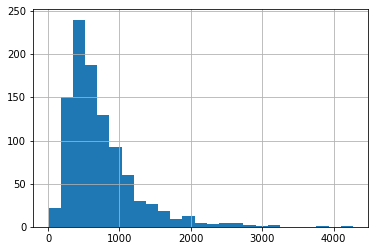

In [76]:
df.likes.hist(bins=25)

In [77]:
df.to_csv('wise.tsv', sep='\t', index=None)

#### По аналогии можно скачать интересующие нам данные